<a href="https://colab.research.google.com/github/Dh-arch1923/My-Work/blob/main/KNN_Algorithm(p).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here i am going to predect a random person wether he is suffering from diabetes or not  from KNN Algoritm


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
diabetes=pd.read_csv('/content/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
print(len(diabetes))
print(diabetes.head())
print(diabetes.columns)

768
   Pregnancies  Glucose  BloodPressure  SkinThickness  ...   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35  ...  33.6                     0.627   50        1
1            1       85             66             29  ...  26.6                     0.351   31        0
2            8      183             64              0  ...  23.3                     0.672   32        1
3            1       89             66             23  ...  28.1                     0.167   21        0
4            0      137             40             35  ...  43.1                     2.288   33        1

[5 rows x 9 columns]
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [10]:
#Replacing the zeros
zero_not_acceptabel=['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','Insulin']
for column in zero_not_acceptabel:
  diabetes[column]=diabetes[column].replace(0,np.NaN)
  mean=diabetes[column].mean(skipna=True)
  diabetes[column]=diabetes[column].replace(np.NaN,mean)

In [12]:
print(diabetes['Glucose'])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64


In [19]:
# Split the data set into test and train
x=diabetes.iloc[:,:8]#independent variable
y=diabetes.iloc[:,8]#dependent variable
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0       6.000000    148.0           72.0  ...  33.6                     0.627   50
1       1.000000     85.0           66.0  ...  26.6                     0.351   31
2       8.000000    183.0           64.0  ...  23.3                     0.672   32
3       1.000000     89.0           66.0  ...  28.1                     0.167   21
4       4.494673    137.0           40.0  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763    10.000000    101.0           76.0  ...  32.9                     0.171   63
764     2.000000    122.0           70.0  ...  36.8                     0.340   27
765     5.000000    121.0           72.0  ...  26.2                     0.245   30
766     1.000000    126.0           60.0  ...  30.1                     0.349   47
767     1.000000     93.0           70.0  ...  30.4                     0.315   23

[76

In [21]:
#Normalize the independent variables
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 0.50625491,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-1.17528945, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.17887265,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.16994604, -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-1.17528945,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-1.17528945, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

In [22]:
# We are creating the x and y train and test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
#now i want to select the noumber of neighbours
import math
math.sqrt(len(y_test)) # i will choose the odd number which will not create the confusion while classifying the group

12.409673645990857

In [32]:
#now we are going to create a model
model=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [34]:
# now i want to determine the y_pred
y_pred=model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

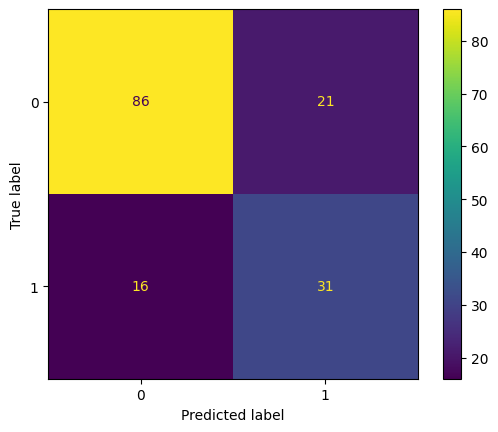

[[86 21]
 [16 31]]


In [43]:
#Predecting the diabetes by plotting the confusion matrics
cm=confusion_matrix(y_test,y_pred)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(cm)


In [44]:
# Check the acuraccy of the model
print('the accuracy of the KNN algorithem is:',accuracy_score(y_test,y_pred))

the accuracy of the KNN algorithem is: 0.7597402597402597


In [46]:
# check the f1 score of the algoritheam
print('the f1 score of the KNN algoritheam is:',f1_score(y_test,y_pred))


the f1 score of the KNN algoritheam is: 0.6262626262626263
